In [ ]:
## Income - Mortality Relationships Analysis 

In [11]:
# read sample data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   



In [12]:
data=pd.read_csv('income_mortality.csv')    

In [13]:
data.head(5)

,acct_no,income,age,male,smoker,comorbidity_count,urban,mortality
0,acct_80365508,2925401,49.9,1,0,1,1,0
1,acct_53948865,4068298,47.5,0,0,1,1,0
2,acct_75977171,3557880,36.9,0,0,1,1,0
3,acct_70859035,1245870,66.9,0,0,2,1,0
4,acct_86718542,1560698,30.6,0,0,2,1,0


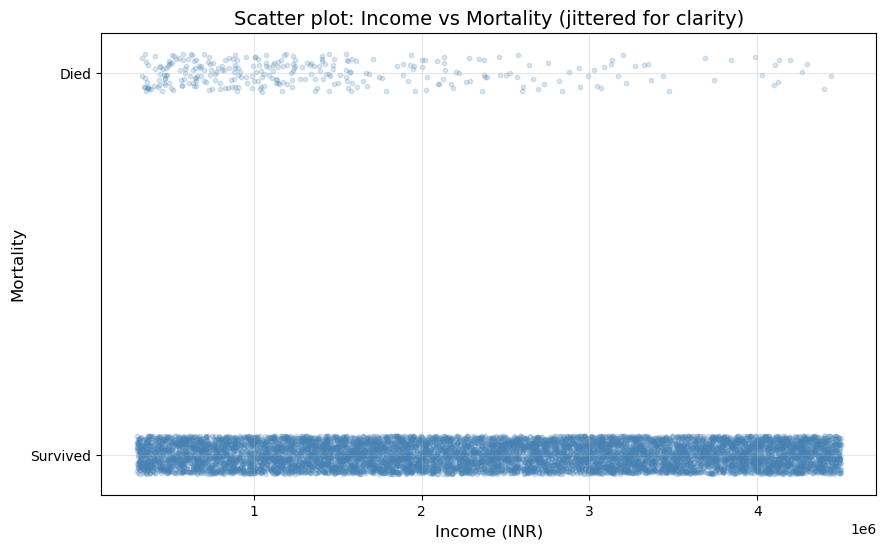

In [14]:
# Scatter plot rewritten using matplotlib's fig, ax style

fig, ax = plt.subplots(figsize=(10,6))

rng = np.random.default_rng()
# Add jitter for mortality
y_jitter = data['mortality'] + rng.uniform(-0.05, 0.05, size=len(data))

ax.scatter(data['income'], y_jitter, alpha=0.2, s=10, color="steelblue")
ax.set_yticks([0,1])
ax.set_yticklabels(["Survived","Died"])
ax.set_xlabel("Income (INR)", fontsize=12)
ax.set_ylabel("Mortality", fontsize=12)
ax.set_title("Scatter plot: Income vs Mortality (jittered for clarity)", fontsize=14)
ax.grid(True, alpha=0.3)

plt.show()

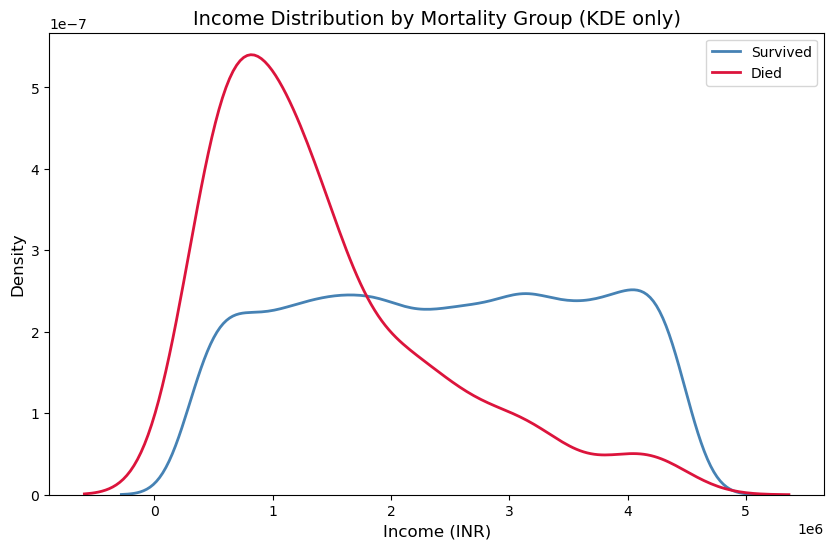

In [15]:


# Set up figure
fig, ax = plt.subplots(figsize=(10,6))

# KDE for survivors (mortality=0)
sns.kdeplot(data[data['mortality']==0]['income'], 
            color="steelblue", linewidth=2, ax=ax, label="Survived")

# KDE for deaths (mortality=1)
sns.kdeplot(data[data['mortality']==1]['income'], 
            color="crimson", linewidth=2, ax=ax, label="Died")

# Labels and legend
ax.set_xlabel("Income (INR)", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.set_title("Income Distribution by Mortality Group (KDE only)", fontsize=14)
ax.legend()

plt.show()


C:\Users\datahack\AppData\Local\Temp\ipykernel_16596\3898295208.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_table = data.groupby('income_bin').agg(


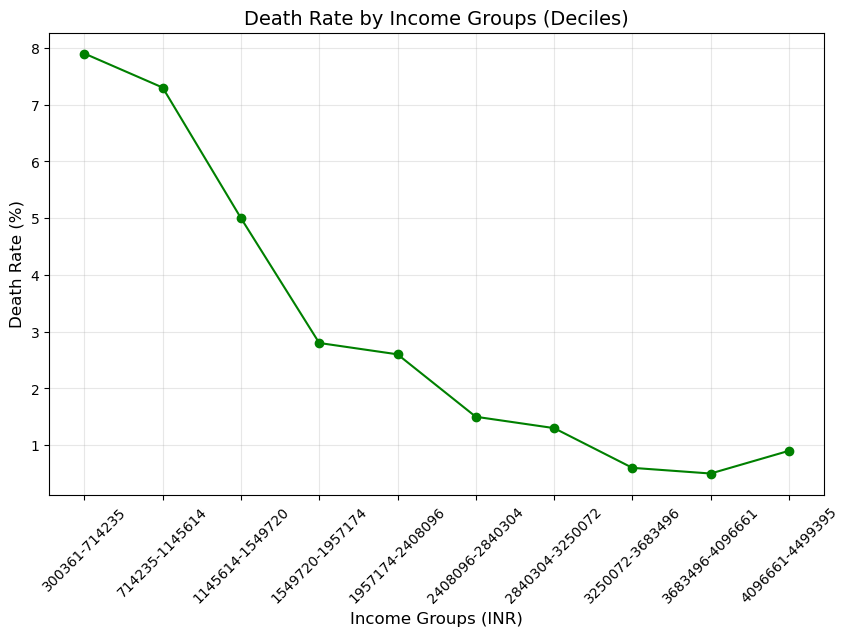

In [16]:
# --- IGNORE ---
# create bin table for income 


# Bin income into deciles
data['income_bin'] = pd.qcut(data['income'], q=10, duplicates='drop')

# Bin table: counts and death rate
bin_table = data.groupby('income_bin').agg(
    n=('mortality','size'),
    deaths=('mortality','sum')
).reset_index()
bin_table['death_rate'] = bin_table['deaths'] / bin_table['n']

# Extract numeric min/max for plotting
bin_table['income_min'] = bin_table['income_bin'].apply(lambda x: int(x.left))
bin_table['income_max'] = bin_table['income_bin'].apply(lambda x: int(x.right))
bin_table['label'] = bin_table['income_min'].astype(str) + "-" + bin_table['income_max'].astype(str)

# Plot death rate by income bins
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(bin_table['label'], bin_table['death_rate']*100, marker='o', linestyle='-', color="green")

ax.set_xlabel("Income Groups (INR)", fontsize=12)
ax.set_ylabel("Death Rate (%)", fontsize=12)
ax.set_title("Death Rate by Income Groups (Deciles)", fontsize=14)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3)

plt.show()

# bin_table[['income_min','income_max','n','deaths','death_rate']]
